<a href="https://colab.research.google.com/github/rajaramk2306/TSF_GRIP/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXPLORATORY DATA ANALYSIS - RETAIL

Task: To perform EDA on the given dataset and find out weak areas where we can make profit.

Dataset: https://bit.ly/3i4rbWl

**TASK DONE BY RAJARAM K**

## IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##IMPORTING THE DATASET

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## EXPLORING THE DATASET

### SHAPE OF THE DATASET

In [4]:
df.shape

(9994, 13)

### DATA-TYPE

In [5]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

### CHECKING FOR NULL VALUES

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

###CHECKING FOR UNIQUE VALUES IN EACH COLUMN

In [7]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

###CHECKING FOR NEGATIVE VALUES

In [8]:
Postal_Code = df[(df['Postal Code']<0)]
Sales = df[(df['Sales']<0)]
Quantity = df[(df['Quantity']<0)]
Discount = df[(df['Discount']<0)]
Profit = df[(df['Profit']<0)]
print('Number of negative values in Postal_Code column :',len(Postal_Code))
print('Number of negative values in Sales column :',len(Sales))
print('Number of negative values in Quantity column :',len(Quantity))
print('Number of negative values in Discount column :',len(Discount))
print('Number of negative values in Profit column :',len(Profit))

Number of negative values in Postal_Code column : 0
Number of negative values in Sales column : 0
Number of negative values in Quantity column : 0
Number of negative values in Discount column : 0
Number of negative values in Profit column : 1871


###CHECKING FOR DUPLICATE AND DROPPING THEM

In [9]:
df.duplicated().sum()

17

In [10]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [11]:
df.duplicated().sum()

0

###EXPLORING DATA

In [12]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [14]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


###GRAPHICAL EXPLORATION OF DATA BASED ON PROFIT

In [15]:
ShipMode_Revenue = df.groupby(df['Ship Mode'])['Profit'].sum().sort_values()
Segment_Revenue = df.groupby(df['Segment'])['Profit'].sum().sort_values()
City_Revenue = df.groupby(df['City'])['Profit'].sum().sort_values()
State_Revenue = df.groupby(df['State'])['Profit'].sum().sort_values()
Region_Revenue = df.groupby(df['Region'])['Profit'].sum().sort_values()
Category_Revenue = df.groupby(df['Category'])['Profit'].sum().sort_values()
Sub_Category_Revenue = df.groupby(df['Sub-Category'])['Profit'].sum().sort_values()
Discount_Revenue = df.groupby(df['Discount'])['Profit'].sum().sort_values()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


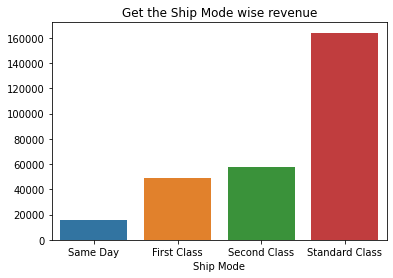

In [16]:
plt.subplots()
sns.barplot(ShipMode_Revenue.index, ShipMode_Revenue.values, order=ShipMode_Revenue.index)
plt.title('Get the Ship Mode wise revenue')
plt.xlabel='Ship Mode'
plt.ylabel='Profit'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


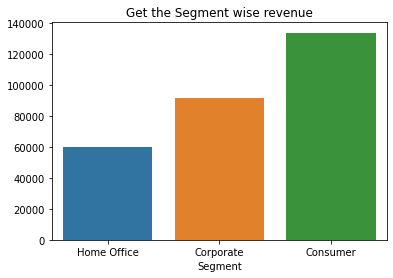

In [17]:
sns.barplot(Segment_Revenue.index, Segment_Revenue.values, order=Segment_Revenue.index)
plt.title('Get the Segment wise revenue')
plt.xlabel='Segment'
plt.ylabel='Profit'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


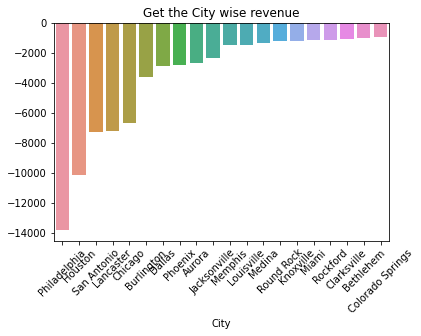

In [18]:
sns.barplot(City_Revenue.iloc[0:20].index, City_Revenue.iloc[0:20].values, order=City_Revenue.iloc[0:20].index)
plt.title('Get the City wise revenue')
plt.xticks(rotation=45)
plt.ylabel='Profit'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


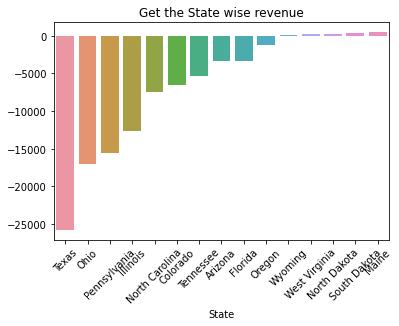

In [19]:
sns.barplot(State_Revenue.iloc[0:15].index, State_Revenue.iloc[0:15].values, order=State_Revenue.iloc[0:15].index)
plt.title('Get the State wise revenue')
plt.xticks(rotation=45)
plt.ylabel='Profit'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


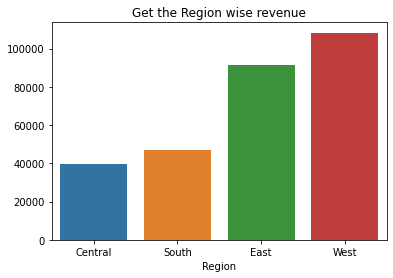

In [20]:
sns.barplot(Region_Revenue.index, Region_Revenue.values, order=Region_Revenue.index)
plt.title('Get the Region wise revenue')
plt.xlabel='Region'
plt.ylabel='Profit'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


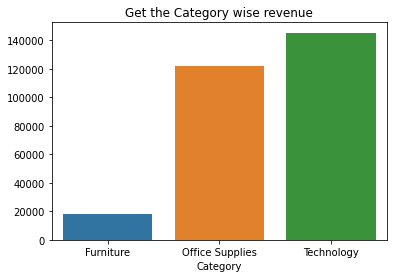

In [21]:
sns.barplot(Category_Revenue.index, Category_Revenue.values, order=Category_Revenue.index)
plt.title('Get the Category wise revenue')
plt.xlabel='Category'
plt.ylabel='Profit'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


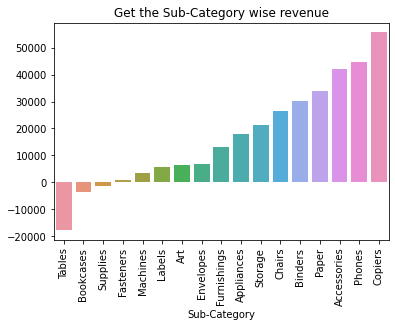

In [22]:
sns.barplot(Sub_Category_Revenue.index, Sub_Category_Revenue.values, order=Sub_Category_Revenue.index)
plt.title('Get the Sub-Category wise revenue')
plt.xticks(rotation=90)
plt.ylabel='Profit'

**From the above graphs we can conclude that :**

• Ship mode on Same day is on loss

•Segment on Home Office is on loss

•Cities in Philidelphia, Houston, San and many other cities shows loss

•States in Texas, Ohio, Pennsylvania and many other states shows loss

•The Central region is on loss

•The Furniture Category is on loss

•The Tables, Bookcases, Supplies sub-Category is on loss

•More the percentage of discount more the loss

Above are the weak areas where we have to bring on more profits.

**THANK YOU**